<a href="https://colab.research.google.com/github/Dansah2/Free_Code_Camp_Tutorials/blob/main/03_Pytorch_ComputerVision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch Computer Vision with CNN

In [1]:
# import computer vision libaries in pytorch
# torchvision which is the main one

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.0.1+cu118', '0.15.2+cu118')

In [2]:
# get the dataset FashionMNIST
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17337791.84it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 304471.05it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5324084.26it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17844857.02it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first training examole
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# gives classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# gives class and their indexs
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# returns the targets or labels
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# check the shape
print(f'Image shape {image.shape}')
print(f'Image label {label}')

Image shape torch.Size([1, 28, 28])
Image label 9


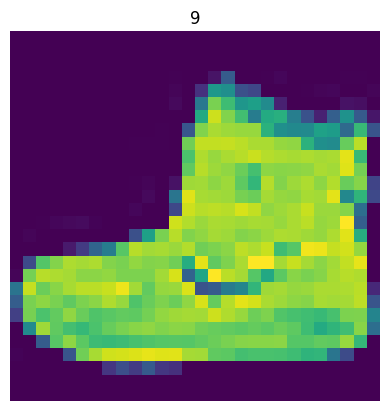

In [9]:
# visulizing the data
import matplotlib.pyplot as plt
# note that if you don't squeeze the image an error will be thrown
# due to too many dimensions
plt.imshow(image.squeeze())
plt.title(label);
plt.axis(False);


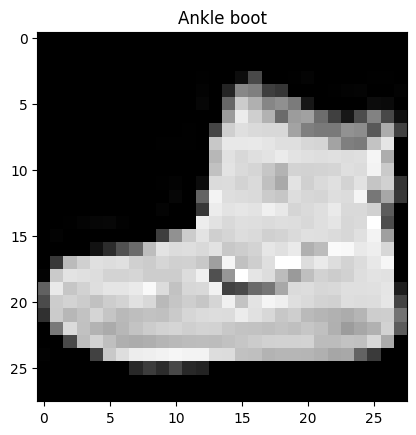

In [10]:
# plot in grayscale
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

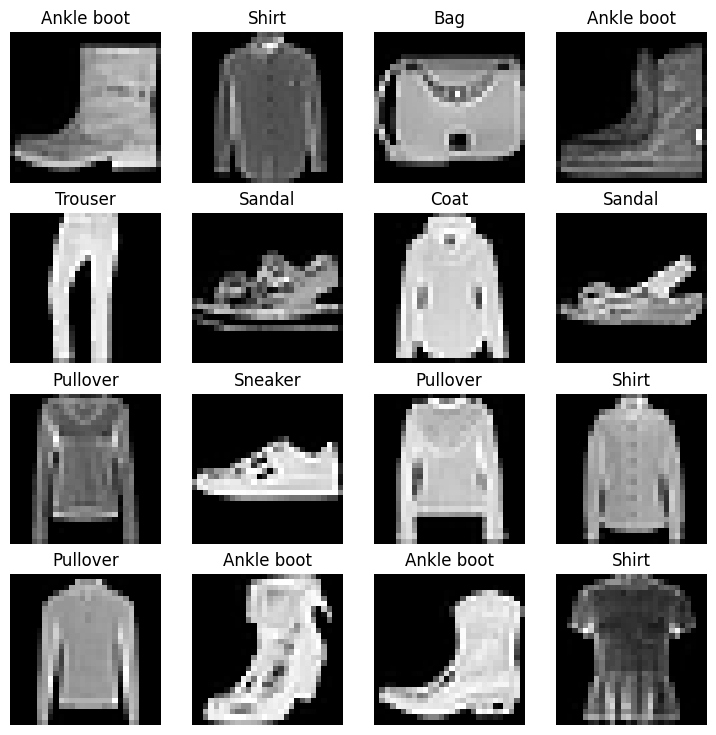

In [11]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False);

In [12]:
# notice that as of now the data is in a dataset
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
# we need to conver the data into a dataloader so that it will
# be a python iterable and make it into mini-batches

from torch.utils.data import DataLoader

# set batch size
BATCH_SIZE = 32

# turn training dataset into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
# turn testing dataset into iterables
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f51aaed5b40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f51aaed5f60>)

In [14]:
# lets check out our dataloaders
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of train_dataloader {len(test_dataloader)} batches of {BATCH_SIZE}')

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f51aaed5b40>, <torch.utils.data.dataloader.DataLoader object at 0x7f51aaed5f60>)
Length of train_dataloader 1875 batches of 32
Length of train_dataloader 313 batches of 32


In [15]:
# check out what is inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:v torch.Size([1, 28, 28])
Label: torch.Size([])


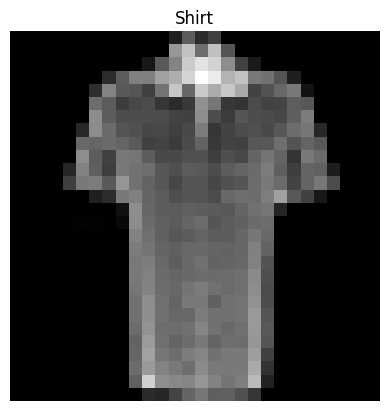

In [16]:
from torchvision.transforms.transforms import random
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size:v {img.shape}')
print(f'Label: {label.shape}')

In [17]:
# build the model

# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x)

print(f'Before flatten: {x.shape} -> [color_channels, height, width]')
print(f'After flatter: {output.shape} -> [color_channels, height * width]')

Before flatten: torch.Size([1, 28, 28]) -> [color_channels, height, width]
After flatter: torch.Size([1, 784]) -> [color_channels, height * width]


In [18]:
from torch import nn
class FasionMNISTModelVO(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model_O = FasionMNISTModelVO(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')
model_O

FasionMNISTModelVO(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_O(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
# use cross entropy loss and SGD for optimizer
# and accuracy as eval metric

import requests
from pathlib import Path

# download helper functions from Learn PyTorch repo
if Path('helper_function.py').is_file():
  print('helper_function.py already exists, skipping download')
else:
  print('Downloading helper_functions.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [22]:
# import accuracy metrics
from helper_functions import accuracy_fn

# setup loss function
loss_fn = nn.CrossEntropyLoss()

# setup optimizer
optimizer = torch.optim.SGD(params=model_O.parameters(), lr=0.1)

In [23]:
### creating a function to time our experiments
# track model performance
# track how fast it runs

from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ prints difference between start and end time"""
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [24]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


4.7854999991159275e-05

In [25]:
# create a training loop and training a model on batches of data

# import progress bar tqdm
from tqdm.auto import tqdm

# set the deed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# create a training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n______')

  ### training
  train_loss = 0

  # loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_O.train()

    # forward pass
    y_pred = model_O(X)

    #calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    # print out what is happening
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)}')

  # divide the total train loss by len of train data loader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0

  # put in eval mode
  model_O.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_O(X_test)

      # calculate the loss
      test_loss = loss_fn(test_pred, y_test)

      # calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what is happening
  print(f'\nTrain loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_O = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_O.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
______
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.5904, Test loss: 0.0010, Test acc: 82.0387
Epoch: 1
______
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4763, Test loss: 0.0009, Test acc: 83.1969
Epoch: 2
______
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.4550, Test loss: 0.0011, Test acc: 83.4265
Train time on cpu: 38.617 seconds


In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """returns a dictionary containint the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)

      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale the loss and acc to find the average per batch
    loss  /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__, #works only if a model was created with a class
          'model_loss': loss.item(),
          'model_acc': acc}

# calculate model_O results on the test set
model_O_results = eval_model(model=model_O,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_O_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FasionMNISTModelVO',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [27]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [28]:
# build a model with non linearity
class FashionMNISTMODELV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [29]:
torch.manual_seed(42)
model_1 = FashionMNISTMODELV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
# create loss and optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [31]:
# build a function for training and testing loops

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """performs a training with model tring to learn on data_loader"""
  train_loss, train_acc = 0, 0

  # put model into training mode
  model.train()

  # add loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):

    # put data on target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # calculate the loss and acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # calculate loss and acc per epoch and print out what is happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%')

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """performs testing loop step on model going over data_loader"""
  test_loss, test_acc = 0, 0

  # put model in eval mode
  model.eval()

  # put model in inference mode
  with torch.inference_mode():

    for X, y in data_loader:

      # send data to the target device
      X, y = X.to(device), y.to(device)

      # forward pass
      test_pred = model(X)

      # calculate the loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # adjust metrics and print out what is happening
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [32]:
torch.manual_seed(42)
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# create an optimization and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------')
  train_step(data_loader=train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
--------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
--------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 40.580 seconds


In [33]:
model_O_results

{'model_name': 'FasionMNISTModelVO',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [34]:
total_train_time_model_O

38.61662465699999

In [35]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """returns a dictionary containint the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # send the data to the device
      X, y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)

      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale the loss and acc to find the average per batch
    loss  /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__, #works only if a model was created with a class
          'model_loss': loss.item(),
          'model_acc': acc}

# calculate model_O results on the test set
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [36]:
model_O_results

{'model_name': 'FasionMNISTModelVO',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [37]:
# model 2, a convolutional neural net
class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates TinyVGG"""

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f'Output shape of conv_block_1 {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Output shape of conv_block_2 {x.shape}')
    x = self.classifier(x)
    #print(f'Output shpae of classifier: {x.shape}')
    return x


In [38]:
image.shape

torch.Size([1, 28, 28])

In [39]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

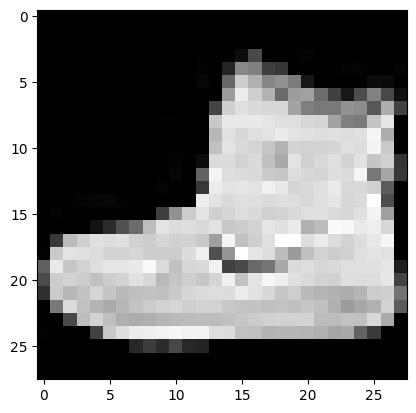

In [40]:
plt.imshow(image.squeeze(), cmap='gray');

In [41]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [42]:
# model_2(rand_image_tensor.to(device))

In [43]:
# create dummy data
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f'Image bath shape: {images.shape} -> [batch_size, color_channels, height, width]')
print(f'Single image shape: {test_image.shape} -> [color_channels, height, width]')
print(f'Single image pixel values:\n{test_image}')

Image bath shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609, 

In [44]:
# create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,   # color channels
                       out_channels=10, #hidden units
                       kernel_size=(3, 3),
                       stride=1,
                       padding=1)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

In [45]:
test_image.shape

torch.Size([3, 64, 64])

In [46]:
# stepping through the nn.MaxPool2d()

In [47]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [48]:
# create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

# pass data through the maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through the maxpool layer {test_image_through_conv_and_max_pool.shape}')

Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through the maxpool layer torch.Size([10, 32, 32])


In [49]:
torch.manual_seed(42)

# create another random tensor with similar dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f'\nRandom tensor:\n {random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

# create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tendor to the maxpool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [50]:
# setup a loss function and optimizer for model_2

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [51]:
from torch.utils import data
# training and testing model_2 using the training and testing fucntions
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#measure time
from timeit import default_timer
train_time_start_model_2 = timer()

# train model
epochs =3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59625 | Train accuracy: 78.27%
Test loss: 0.39983 | Test accuracy: 85.61%

Epoch: 1
------
Train loss: 0.36216 | Train accuracy: 86.87%
Test loss: 0.34706 | Test accuracy: 87.04%

Epoch: 2
------
Train loss: 0.32441 | Train accuracy: 88.24%
Test loss: 0.32459 | Test accuracy: 88.21%

Train time on cuda: 49.251 seconds


In [52]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32458674907684326,
 'model_acc': 88.20886581469648}

In [53]:
# compare models and training time

import pandas as pd

compare_results = pd.DataFrame([model_O_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FasionMNISTModelVO,0.476639,83.426518
1,FashionMNISTMODELV1,0.685001,75.019968
2,FashionMNISTModelV2,0.324587,88.208866


In [54]:
# add the training time to results comparision
compare_results['training_time'] = [total_train_time_model_O,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FasionMNISTModelVO,0.476639,83.426518,38.616625
1,FashionMNISTMODELV1,0.685001,75.019968,40.579566
2,FashionMNISTModelV2,0.324587,88.208866,49.251216


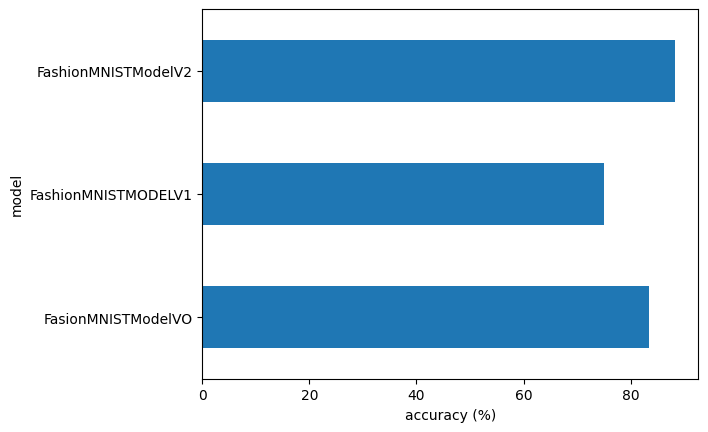

In [55]:
# visualize the model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

In [56]:
# make and evaluate random predictions with the best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prep the sample (might have to add batch dimension)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      #obtain logits
      pred_logit = model(sample)

      # obtain prediction probabilities
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn the list into a tensor
  return torch.stack(pred_probs)

In [57]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label, in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

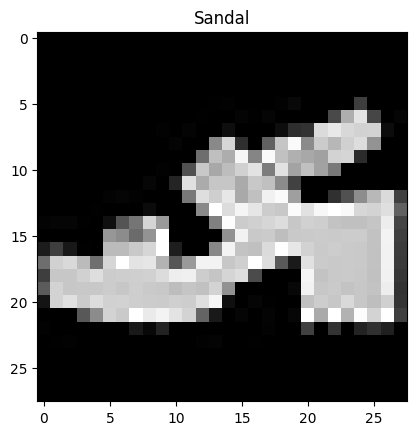

In [58]:
plt.imshow(test_samples[0].squeeze(), cmap='gray');
plt.title(class_names[test_labels[0]])

In [59]:
# make predictions

pred_probs = make_predictions(model_2,
                              data=test_samples)

# view the first two prediction probabilities
pred_probs[:2]

tensor([[2.3497e-07, 9.3699e-08, 1.1441e-07, 5.6260e-07, 1.9472e-08, 9.9969e-01,
         3.4638e-07, 5.2356e-05, 1.2871e-04, 1.3012e-04],
        [5.2906e-02, 5.3978e-01, 2.7186e-03, 1.6955e-01, 1.1465e-01, 3.0958e-04,
         1.1840e-01, 5.9306e-04, 3.3278e-04, 7.4996e-04]])

In [60]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [61]:
# conver prediction probabilities to labesl
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

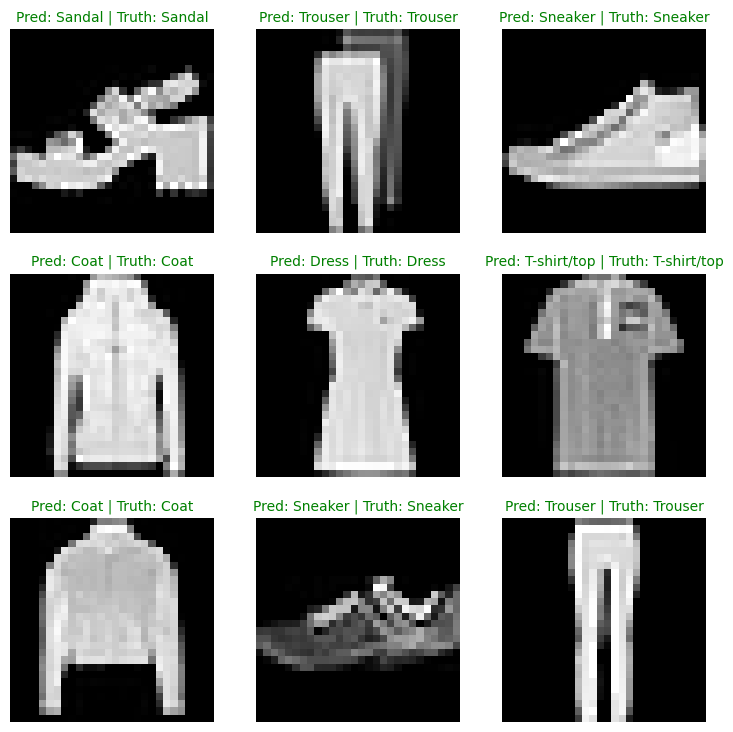

In [62]:
# plot predictions
plt.figure(figsize=(9,9))
nrows =3
ncols =3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)

  #plot target image
  plt.imshow(sample.squeeze(), cmap='gray')

  #find the prediction in text form
  pred_label = class_names[pred_classes[i]]

  #get the truth labels
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f'Pred: {pred_label} | Truth: {truth_label}'

  # check for equality between pred and truch and change the
  # color of the title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False);

In [63]:
# make and plot confusion matrix
# this is a great was to evaluate classification models

In [64]:
from tqdm.auto import tqdm

# make predictions with trained moded
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions...'):
    # send data to device
    X, y = X.to(device), y.to(device)
    # do the forward pass
    y_logit = model_2(X)
    # covert logits to prediction probabilities to prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # put predictions on the cpu for evaluation
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [65]:
len(y_pred_tensor)

10000

In [66]:
# see if required packages are installed and if not, install them
try:
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1] >= 19, 'mlxtend version should be 0.19.0 or higher')
except:
  !pip install -q torchmetrics -U mlxtend # may have to restart runtime
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.3 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
# import confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion instance and compare predictions
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [ ]:
confmat_tensor

In [ ]:
from numpy import True_
# save and load best performing model
from pathlib import Path

#create model directory path
MODEL_Path = Path('models')
MODEL_Path.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_Path / MODEL_NAME

# save the model state dict
print(f'Saving the model to {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
# load the saved state_dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to the target device
loaded_model_2.to(device)

In [ ]:
# look at the original model results
model_2_results

In [ ]:
# evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

In [ ]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-02,
              rtol=0.0001) # close within 2 decimal places